In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools
import seaborn as sns

In [6]:
file_path = r'D:\SEM 7\ReinforcementLearning_MegaProject\Datasets\ELEData\ELEData\TraitData\AVONET3_BirdTree.xlsx'
df = pd.read_excel(file_path, sheet_name='AVONET3_BirdTree')
df.head()

,Species3,Family3,Order3,Total.individuals,Female,Male,Unknown,Complete.measures,Beak.Length_Culmen,Beak.Length_Nares,...,Migration,Trophic.Level,Trophic.Niche,Primary.Lifestyle,Min.Latitude,Max.Latitude,Centroid.Latitude,Centroid.Longitude,Range.Size,Species.Status
0,Accipiter albogularis,Accipitridae,Accipitriformes,5,2,0,3,4,27.7,17.8,...,2.0,Carnivore,Vertivore,Insessorial,-11.73,-4.02,-8.15,158.493765,37461.21,Extant
1,Accipiter badius,Accipitridae,Accipitriformes,10,4,6,0,8,20.6,12.1,...,3.0,Carnivore,Vertivore,Insessorial,-29.47,46.39,8.23,44.982464,22374973.00,Extant
2,Accipiter bicolor,Accipitridae,Accipitriformes,6,2,2,2,4,26.5,14.8,...,2.0,Carnivore,Vertivore,Generalist,NaN,NaN,NaN,NaN,NaN,Extant
3,Accipiter brachyurus,Accipitridae,Accipitriformes,4,4,0,0,3,22.5,14.0,...,2.0,Carnivore,Vertivore,Insessorial,-6.31,-4.08,-5.45,150.681314,35580.71,Extant
4,Accipiter brevipes,Accipitridae,Accipitriformes,8,4,4,0,4,21.1,12.1,...,3.0,Carnivore,Vertivore,Generalist,31.19,55.86,45.24,45.327340,2936751.80,Extant


In [7]:
df.columns

Index(['Species3', 'Family3', 'Order3', 'Total.individuals', 'Female', 'Male',
       'Unknown', 'Complete.measures', 'Beak.Length_Culmen',
       'Beak.Length_Nares', 'Beak.Width', 'Beak.Depth', 'Tarsus.Length',
       'Wing.Length', 'Kipps.Distance', 'Secondary1', 'Hand-Wing.Index',
       'Tail.Length', 'Mass', 'Mass.Source', 'Mass.Refs.Other', 'Inference',
       'Traits.inferred', 'Reference.species', 'Habitat', 'Habitat.Density',
       'Migration', 'Trophic.Level', 'Trophic.Niche', 'Primary.Lifestyle',
       'Min.Latitude', 'Max.Latitude', 'Centroid.Latitude',
       'Centroid.Longitude', 'Range.Size', 'Species.Status'],
      dtype='object')

In [8]:
df = df.drop(columns=['Mass.Source', 'Mass.Refs.Other', 'Inference', 'Traits.inferred', 'Reference.species'])
df.columns = df.columns.str.strip()
df = df.dropna()

In [9]:
df.shape

(9787, 31)

In [10]:
df.columns = df.columns.str.strip()
df.columns

Index(['Species3', 'Family3', 'Order3', 'Total.individuals', 'Female', 'Male',
       'Unknown', 'Complete.measures', 'Beak.Length_Culmen',
       'Beak.Length_Nares', 'Beak.Width', 'Beak.Depth', 'Tarsus.Length',
       'Wing.Length', 'Kipps.Distance', 'Secondary1', 'Hand-Wing.Index',
       'Tail.Length', 'Mass', 'Habitat', 'Habitat.Density', 'Migration',
       'Trophic.Level', 'Trophic.Niche', 'Primary.Lifestyle', 'Min.Latitude',
       'Max.Latitude', 'Centroid.Latitude', 'Centroid.Longitude', 'Range.Size',
       'Species.Status'],
      dtype='object')

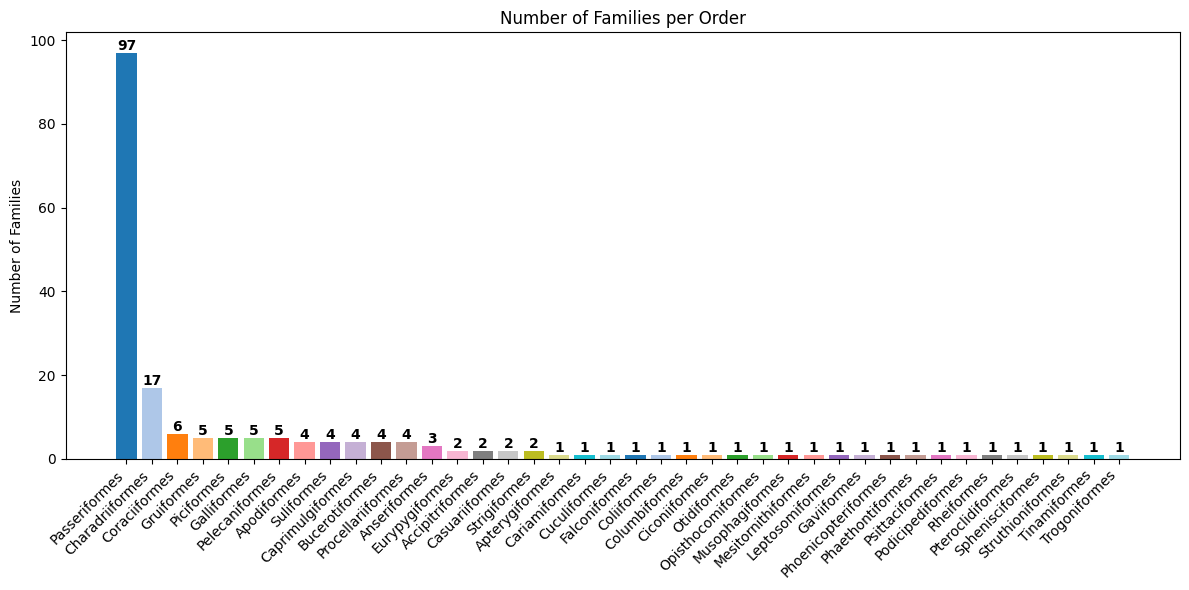

In [11]:
families_per_order = df.groupby('Order3')['Family3'].nunique().sort_values(ascending=False)

colors = plt.cm.tab20.colors

plt.figure(figsize=(12, 6))
bars = plt.bar(families_per_order.index, families_per_order.values, color=colors[:len(families_per_order)])

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

plt.ylabel('Number of Families')
plt.title('Number of Families per Order')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

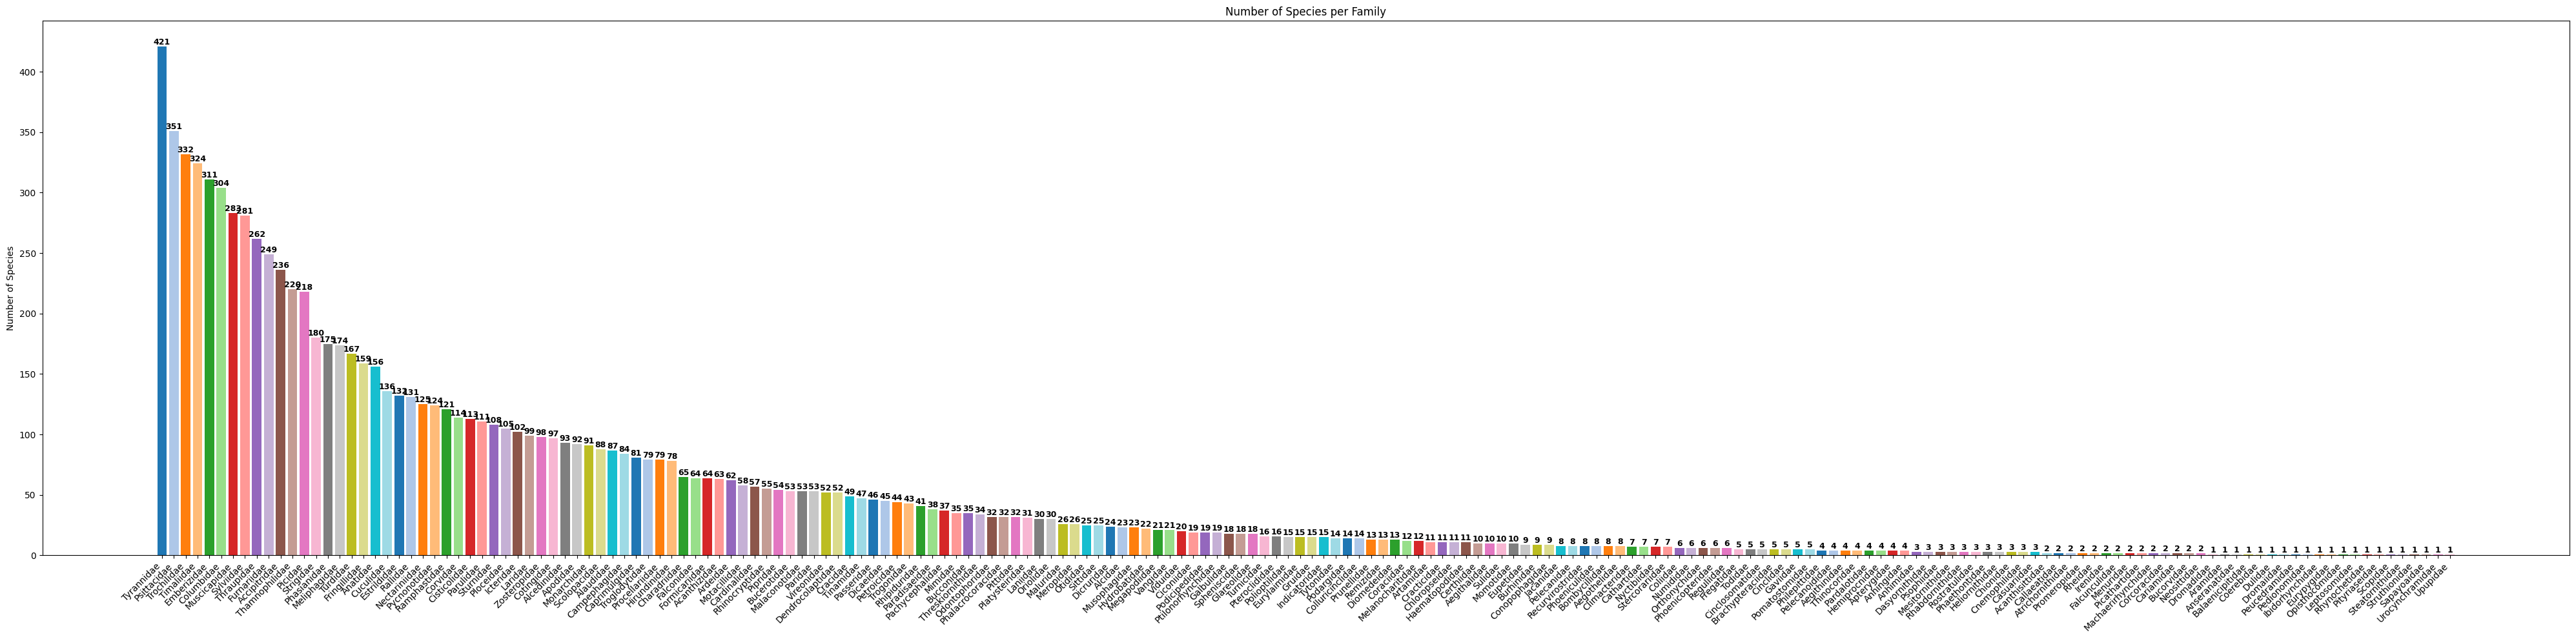

In [15]:
species_per_family = df.groupby('Family3')['Species3'].nunique().sort_values(ascending=False)

colors = plt.cm.tab20.colors
if len(species_per_family) > 20:
    colors = list(itertools.islice(itertools.cycle(colors), len(species_per_family)))

plt.figure(figsize=(40, 10))
bars = plt.bar(species_per_family.index, species_per_family.values, color=colors)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='bold'
    )

plt.ylabel('Number of Species')
plt.title('Number of Species per Family')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [16]:
df.columns

Index(['Species3', 'Family3', 'Order3', 'Total.individuals', 'Female', 'Male',
       'Unknown', 'Complete.measures', 'Beak.Length_Culmen',
       'Beak.Length_Nares', 'Beak.Width', 'Beak.Depth', 'Tarsus.Length',
       'Wing.Length', 'Kipps.Distance', 'Secondary1', 'Hand-Wing.Index',
       'Tail.Length', 'Mass', 'Habitat', 'Habitat.Density', 'Migration',
       'Trophic.Level', 'Trophic.Niche', 'Primary.Lifestyle', 'Min.Latitude',
       'Max.Latitude', 'Centroid.Latitude', 'Centroid.Longitude', 'Range.Size',
       'Species.Status'],
      dtype='object')

In [17]:
numerical_metric_groups = {
    'Beak Measurements': ['Beak.Length_Culmen', 'Beak.Length_Nares', 'Beak.Width', 'Beak.Depth'],
    #'Tarsus Length': ['Tarsus.Length'],
    'Wing Measurements': ['Wing.Length', 'Kipps.Distance', 'Secondary1', 'Hand-Wing.Index'],
    'Tail Length': ['Tail.Length'],
    #'Mass': ['Mass'],
    'Geographical Coordinates': ['Min.Latitude', 'Max.Latitude', 'Centroid.Latitude', 'Centroid.Longitude'],
    'Individual Counts': ['Total.individuals', 'Female', 'Male', 'Unknown', 'Complete.measures']
}

In [18]:
categorical_columns_for_freq = [
    'Habitat',
    'Habitat.Density',
    'Migration',
    'Trophic.Level',
    'Trophic.Niche',
    'Primary.Lifestyle',
    'Species.Status'
]

In [20]:
print("\n--- Correlation Analysis for Numerical Metric Groups ---")
for group_name, metrics in numerical_metric_groups.items():
    current_numerical_metrics = [m for m in metrics if m in df.columns]

    if not current_numerical_metrics:
        print(f"Skipping {group_name}: No relevant columns found in the DataFrame.")
        continue

    numeric_group_df = df[current_numerical_metrics].copy()

    correlation_matrix = numeric_group_df.corr()

    print(f"\nCorrelation Matrix for {group_name}:")
    print(correlation_matrix.to_markdown(numalign="left", stralign="left"))


--- Correlation Analysis for Numerical Metric Groups ---

Correlation Matrix for Beak Measurements:
|                    | Beak.Length_Culmen   | Beak.Length_Nares   | Beak.Width   | Beak.Depth   |
|:-------------------|:---------------------|:--------------------|:-------------|:-------------|
| Beak.Length_Culmen | 1                    | 0.97072             | 0.739422     | 0.709038     |
| Beak.Length_Nares  | 0.97072              | 1                   | 0.729114     | 0.697555     |
| Beak.Width         | 0.739422             | 0.729114            | 1            | 0.904848     |
| Beak.Depth         | 0.709038             | 0.697555            | 0.904848     | 1            |

Correlation Matrix for Wing Measurements:
|                 | Wing.Length   | Kipps.Distance   | Secondary1   | Hand-Wing.Index   |
|:----------------|:--------------|:-----------------|:-------------|:------------------|
| Wing.Length     | 1             | 0.880773         | 0.927478     | 0.378634          

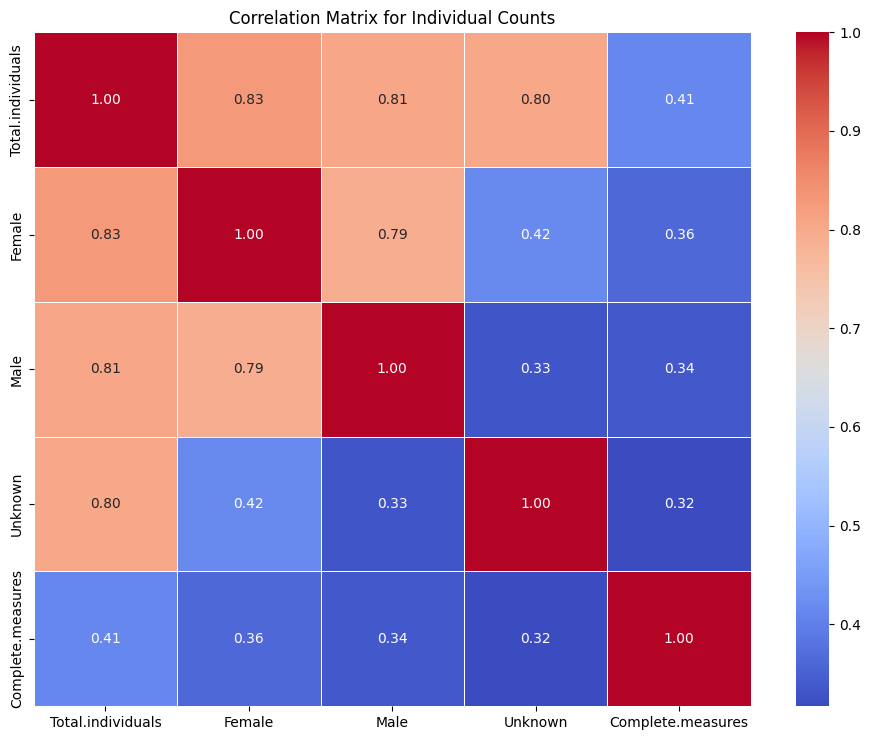

In [21]:
plt.figure(figsize=(len(current_numerical_metrics)*1.5 + 2, len(current_numerical_metrics)*1.5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title(f'Correlation Matrix for {group_name}')
plt.tight_layout()
# plt.savefig(f'correlation_heatmap_{group_name.replace(" ", "_").lower()}.png')
plt.show()


--- Frequency Analysis for Categorical Metrics ---


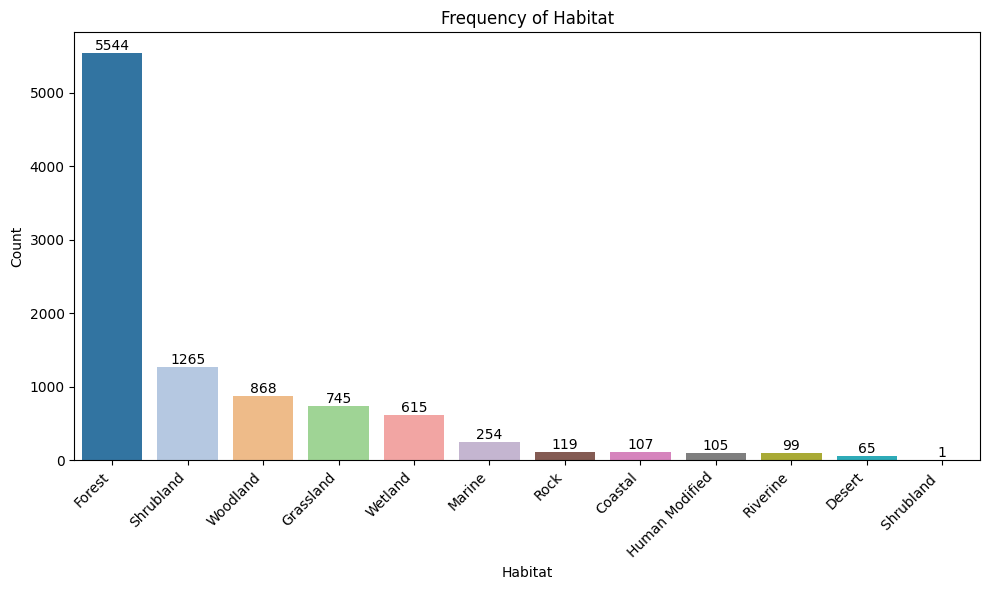

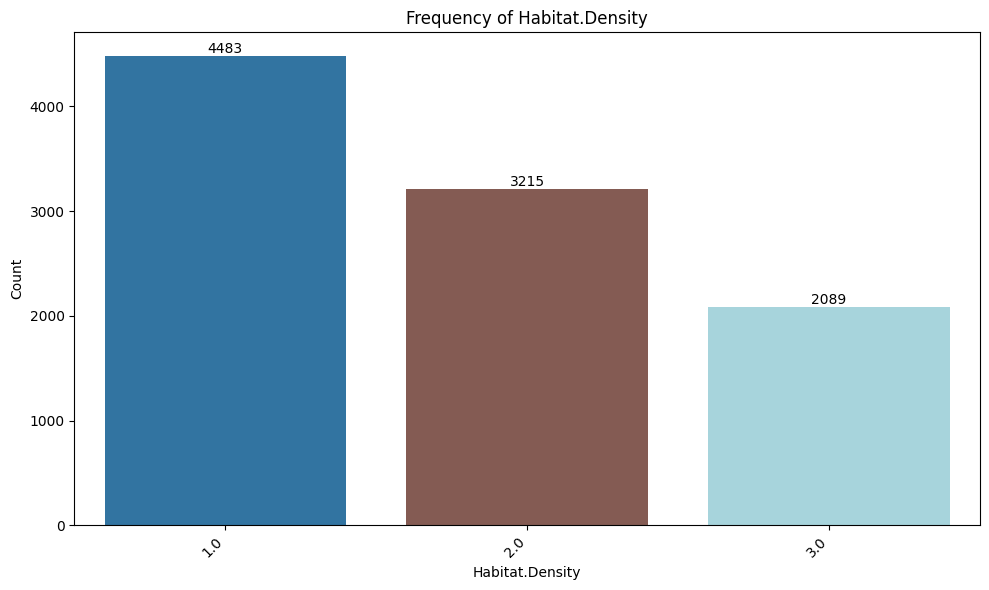

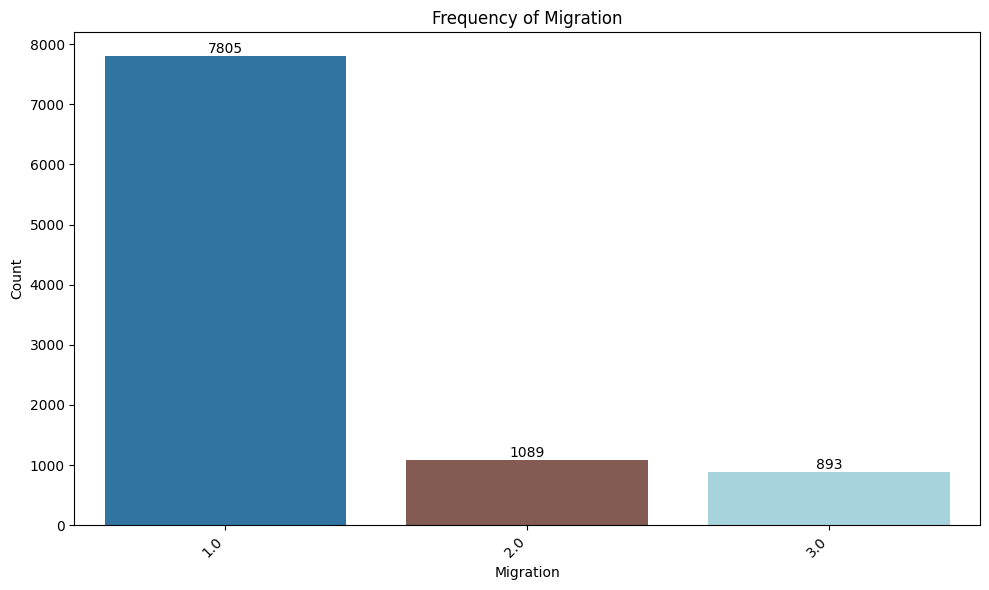

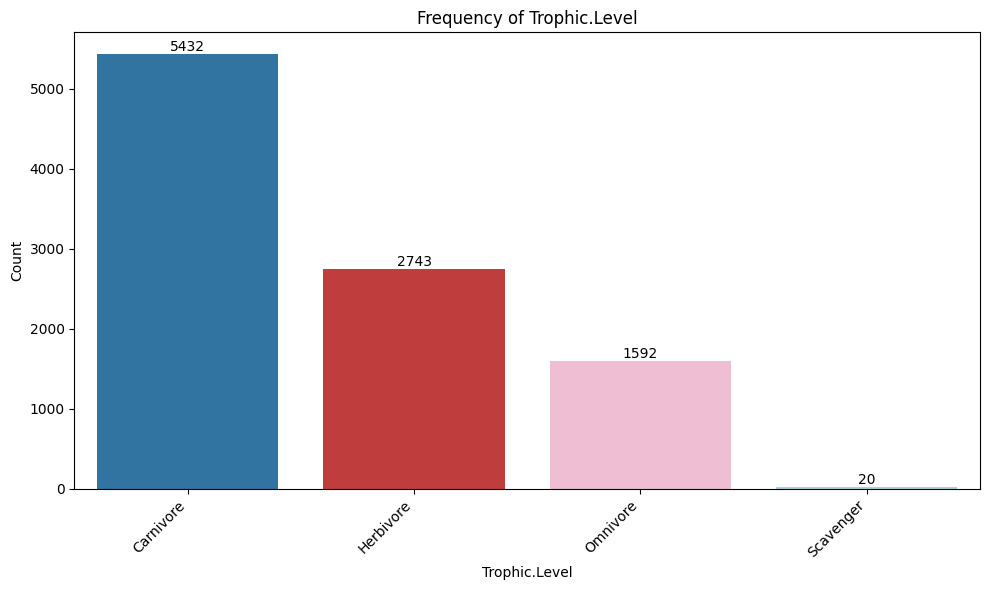

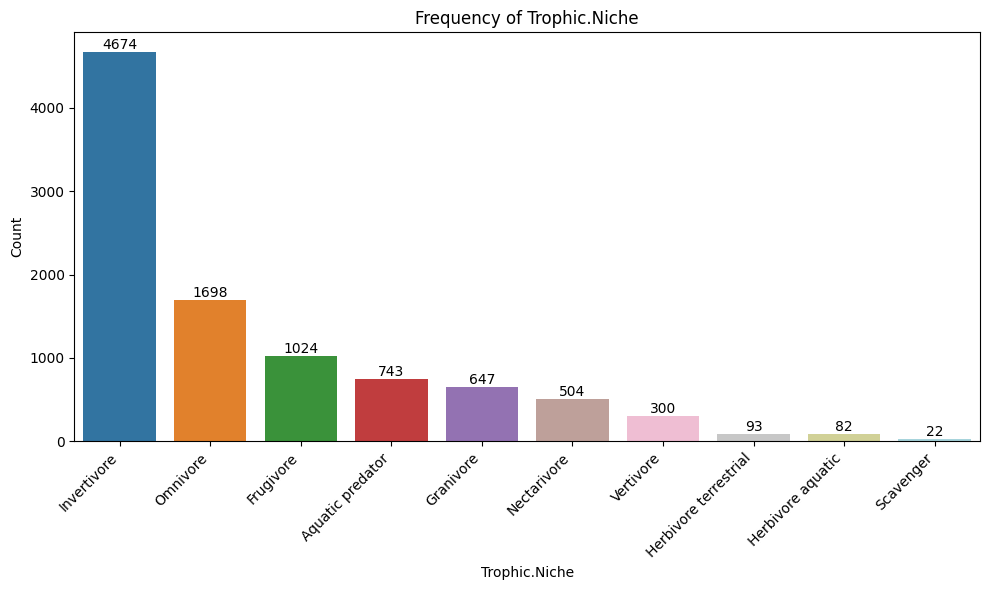

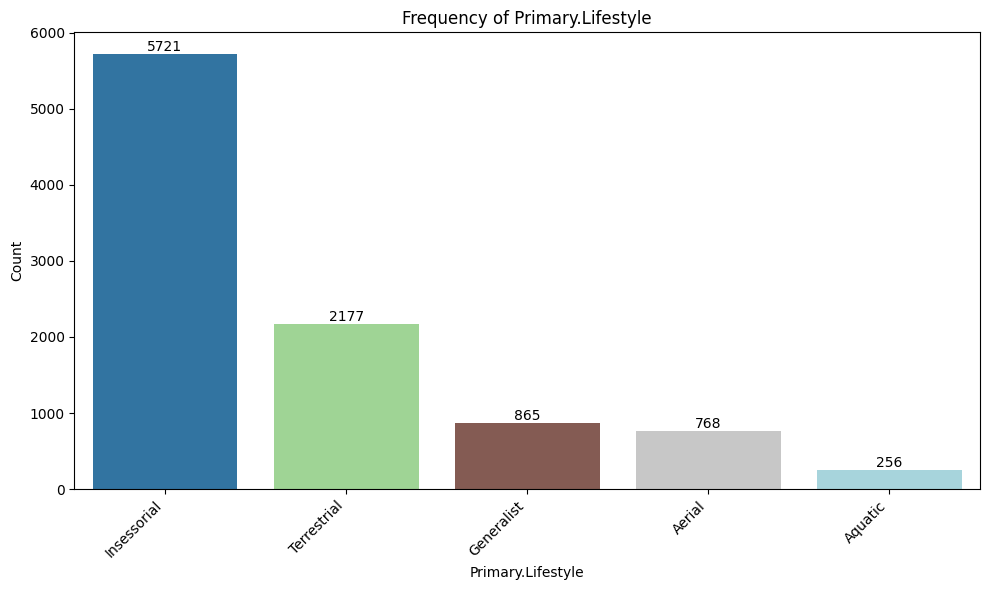

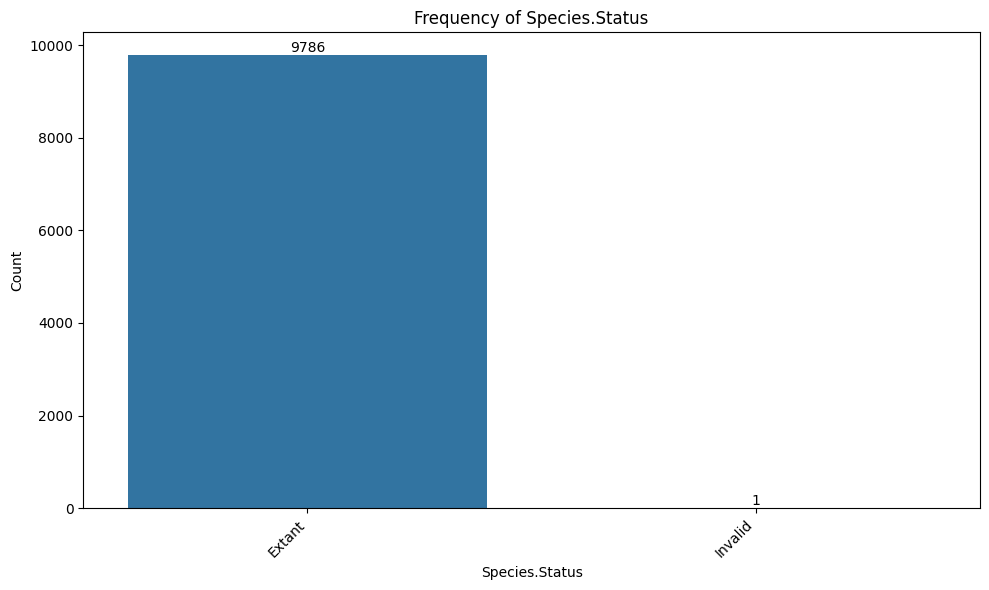

In [22]:
print("\n--- Frequency Analysis for Categorical Metrics ---")
for col_name in categorical_columns_for_freq:
    if col_name in df.columns:
        if (df[col_name].dtype == 'object' or col_name in ['Migration', 'Habitat.Density']) and df[col_name].nunique() < 50:
            value_counts = df[col_name].value_counts()

            n_categories = len(value_counts)
            
            colors_cat_map = plt.get_cmap('tab20') 
            palette = [colors_cat_map(i / (n_categories - 1) if n_categories > 1 else 0) for i in range(n_categories)] # Scale indices for palette, handle n_categories=1

            plt.figure(figsize=(10, 6))
            bars = sns.barplot(x=value_counts.index, y=value_counts.values, hue=value_counts.index, palette=palette, legend=False)
            
            for bar in bars.patches:
                plt.text(
                    bar.get_x() + bar.get_width() / 2,
                    bar.get_height(),
                    f'{int(bar.get_height())}',
                    ha='center',
                    va='bottom',
                    fontsize=10,
                    color='black'
                )

            plt.title(f'Frequency of {col_name}')
            plt.xlabel(col_name)
            plt.ylabel('Count')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
        else:
            print(f"\nSkipping frequency barplot for '{col_name}' as it appears to be numerical with many unique values or an unsupported categorical type ({df[col_name].nunique()} unique values).")
    else:
        print(f"Skipping '{col_name}': Column not found in the DataFrame.")

**Habitat Density:**\
1 = Dense habitats. Species primarily lives in the lower or middle storey of forest, or in dense thickets, dense shrubland etc.\
2 = Semi-open habitats. Species primarily lives in open shrubland, scattered bushes, parkland, low dry or deciduous forest, thorn forest.\
3 = Open habitats. Species primarily lives in desert, grassland, open water, low shrubs, rocky habitats, seashores, cities. Also applies to species living mainly on top of forest canopy (i.e. mostly in the open).

**Migration:**\
1 = Sedentary.\
2 = Partially migratory, i.e. minority of population migrates long distances, or most of population undergoes short-distance migration, nomadic movements, distinct altitudinal migration, etc.\
3 = Migratory, i.e. majority of population undertakes long-distance migration.